### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.grid_search import GridSearchCV
from  sklearn.model_selection import GridSearchCV

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the datasets

In [3]:
audit_df=pd.read_csv('audit_risk.csv')
audit_df.head().T

trial_df=pd.read_csv('trial.csv')
trial_df.head().T

,0,1,2,3,4
Sector_score,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6
PARA_A,4.18,0,0.51,0,0
Score_A,0.6,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0
PARA_B,2.5,4.83,0.23,10.8,0.08
Score_B,0.2,0.2,0.2,0.6,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016
TOTAL,6.68,4.83,0.74,10.8,0.08
numbers,5,5,5,6,5


,0,1,2,3,4
Sector_score,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6
PARA_A,4.18,0,0.51,0,0
SCORE_A,6,2,2,2,2
PARA_B,2.5,4.83,0.23,10.8,0.08
SCORE_B,2,2,2,6,2
TOTAL,6.68,4.83,0.74,10.8,0.08
numbers,5,5,5,6,5
Marks,2,2,2,6,2
Money_Value,3.38,0.94,0,11.75,0


## EXPLORATORY DATA ANALYSIS

### Merging the datasets on the basis of common columns

The two datasets 'audit_risk' and 'trial' are merged on the basis of columns and left inner-join is used to perform the merge operation. 'merged_df' is the new dataset that is created after merging the exisiting datasets

In [4]:
merged_df=pd.merge(audit_df,trial_df,left_on=['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','District_Loss','History','Score']
      ,right_on=['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','District','History','Score'],how='left')

### Dimensions of the new dataset

In [5]:
merged_df.shape

(810, 36)

### Statistical Descriptions of the dataset

In [6]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,810.0,21.406716,24.760476,1.85,2.3700,3.8900,55.5700,59.8500
PARA_A,810.0,2.348556,5.579501,0.00,0.0700,0.8200,2.3975,85.0000
Score_A,810.0,0.344938,0.173042,0.20,0.2000,0.2000,0.6000,0.6000
Risk_A,810.0,1.294561,3.378180,0.00,0.0140,0.1640,1.4385,51.0000
PARA_B,810.0,10.347643,49.067564,0.00,0.0000,0.3350,2.9850,1264.6300
Score_B,810.0,0.308395,0.167741,0.20,0.2000,0.2000,0.4000,0.6000
Risk_B,810.0,6.068334,29.461510,0.00,0.0000,0.0670,1.3470,758.7780
TOTAL,810.0,12.665829,50.292444,0.00,0.4300,1.2900,7.3375,1268.9100
numbers,810.0,5.064815,0.259188,5.00,5.0000,5.0000,5.0000,9.0000
Score_B.1,810.0,0.222716,0.078789,0.20,0.2000,0.2000,0.2000,0.6000


### Sample of the new-merged dataset

In [7]:
merged_df.head().T

,0,1,2,3,4
Sector_score,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6
PARA_A,4.18,0,0.51,0,0
Score_A,0.6,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0
PARA_B,2.5,4.83,0.23,10.8,0.08
Score_B,0.2,0.2,0.2,0.6,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016
TOTAL,6.68,4.83,0.74,10.8,0.08
numbers,5,5,5,6,5


### Frequency distribution of all objects among all features

In [8]:
for x in merged_df.columns:
    print(x, merged_df[x].value_counts())

Sector_score 55.57    230
3.89     114
1.85      97
2.72      84
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64
LOCATION_ID 8          82
19         68
12         59
9          57
16         54
5          46
2          43
15         39
4          37
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
27         10
37         10
39          9
21          8
28          8
43          7
25          6
20          5
30          4
36          4
38          4
7           4
40          3
3           3
35          2
24          1
42          1
23          1
33          1
34          1
44          1
17          1
NUH         1
41          1
LOHARU      1
SAFIDON     1
Name: LOCATION_ID, dtype: int64
PARA_A 0.00     183
0.49      10
0.51       8
0.84       7
0.56       7
1.07       6
0.32       5
0.74       5


### Creating a new copy of 'merged_df' dataset.

In [9]:
merged_new=merged_df.copy()

### Checking for correleation among the features.

In [10]:

#CORRELEATION MATRIXi
import numpy as np

corr = merged_new.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\abhin\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk_x,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_y
Sector_score,1,-0.228134,-0.443803,-0.228714,-0.137807,-0.240494,-0.13559,-0.159565,-0.158123,-0.177761,-0.173497,-0.123204,-0.331867,-0.121563,-0.111028,-0.0913194,-0.132425,-0.119767,-0.143341,-0.107639,-0.357463,-0.180565,-0.160574,nan,-0.096853,-0.404664,-0.443803,-0.240494,-0.177761,-0.331867,-0.111028,-0.0876686,-0.0913194,-0.143341,-0.402013
PARA_A,-0.228134,1,0.502392,0.999242,0.165006,0.365684,0.164823,0.270236,0.137655,0.145115,0.144755,0.450972,0.293078,0.450135,0.129411,0.0464583,0.121608,0.12124,0.176152,0.106645,0.433374,0.484422,0.152796,nan,0.221928,0.383816,0.502392,0.365684,0.145115,0.293078,0.129411,0.0480654,0.0464583,0.176152,0.302092
Score_A,-0.443803,0.502392,1,0.509477,0.253062,0.582331,0.251674,0.301744,0.247789,0.280436,0.271633,0.210375,0.488613,0.20777,0.0938918,0.0980703,0.108867,0.182094,0.269726,0.154788,0.728058,0.326001,0.177392,nan,0.20493,0.625451,1,0.582331,0.280436,0.488613,0.0938918,0.0976286,0.0980703,0.269726,0.680798
Risk_A,-0.228714,0.999242,0.509477,1,0.16812,0.369296,0.167906,0.273185,0.139178,0.14721,0.146665,0.450321,0.297132,0.449464,0.128773,0.0462698,0.121047,0.123864,0.179403,0.109022,0.438238,0.485704,0.154055,nan,0.223617,0.389267,0.509477,0.369296,0.14721,0.297132,0.128773,0.0483276,0.0462698,0.179403,0.298251
PARA_B,-0.137807,0.165006,0.253062,0.16812,1,0.35,0.999935,0.994078,0.211672,0.232867,0.225026,0.126712,0.317233,0.126305,0.0836895,0.0439741,0.0807098,0.204994,0.318054,0.197314,0.398606,0.655286,0.188027,nan,0.887944,0.25912,0.253062,0.35,0.232867,0.317233,0.0836895,0.0461978,0.0439741,0.318054,0.167623
Score_B,-0.240494,0.365684,0.582331,0.369296,0.35,1,0.350462,0.382436,0.281734,0.318516,0.307596,0.20895,0.57427,0.205866,0.00146258,0.0962357,0.0218379,0.204281,0.313095,0.174446,0.902903,0.369839,0.133743,nan,0.210821,0.639428,0.582331,1,0.318516,0.57427,0.00146258,0.102367,0.0962357,0.313095,0.525238
Risk_B,-0.13559,0.164823,0.251674,0.167906,0.999935,0.350462,1,0.993992,0.211372,0.232516,0.224668,0.126712,0.315687,0.126315,0.0838358,0.0442677,0.0810005,0.204206,0.317853,0.196533,0.398264,0.655307,0.187682,nan,0.887723,0.257283,0.251674,0.350462,0.232516,0.315687,0.0838358,0.0464629,0.0442677,0.317853,0.166156
TOTAL,-0.159565,0.270236,0.301744,0.273185,0.994078,0.382436,0.993992,1,0.219794,0.240646,0.233048,0.170564,0.340819,0.170074,0.0942694,0.0481548,0.0907952,0.212406,0.328181,0.203636,0.435939,0.690737,0.198972,nan,0.888189,0.294616,0.301744,0.382436,0.240646,0.340819,0.0942694,0.0505002,0.0481548,0.328181,0.196564
numbers,-0.158123,0.137655,0.247789,0.139178,0.211672,0.281734,0.211372,0.219794,1,0.908401,0.955423,0.188037,0.449117,0.188364,0.125467,0.0375076,0.137988,0.203995,0.211686,0.203858,0.503919,0.273421,0.23009,nan,0.222906,0.310465,0.247789,0.281734,0.908401,0.449117,0.125467,0.000244694,0.0375076,0.211686,0.203257
Score_B.1,-0.177761,0.145115,0.280436,0.14721,0.232867,0.318516,0.232516,0.240646,0.908401,1,0.990443,0.222367,0.50991,0.222598,0.150735,0.038851,0.158718,0.228013,0.2507,0.22496,0.567182,0.311076,0.258137,nan,0.261277,0.356348,0.280436,0.318516,1,0.50991,0.150735,0.00674016,0.038851,0.2507,0.234344


### Removing the highly correlated features.
From the correlation matrix, we can infer that many features exists with more than 90% of correleation between the features. This phenomenon leads to "AUTOCORRELATION" and in turn leads to overfitting. In order to avoid overfitting, the highly correlated features are removed.

In [11]:

merged_new.drop(['Score_A','Score_B','PARA_A','PARA_B','TOTAL','numbers','Score_B.1','Money_Value','District_Loss','Loss','Score','Detection_Risk'],axis=1,inplace=True)

Around 12 features are removed from the dataset due to multicollinearity.

In [12]:
merged_new.shape

(810, 24)

### Removing  NULL values and Duplicates

In [13]:
merged_new.dropna(inplace=True)

#Removing duplicates
merged_new.drop_duplicates(keep=False, inplace=True)


### Removing 'LOCATION_ID' column.

As there are many junk values in the 'LOCATION_ID' and its values cannot be used for prediction and hence removed for better model performance.

In [14]:
merged_new.drop(merged_new[merged_new['LOCATION_ID']=='NUH'].index,inplace=True)
merged_new.drop(merged_new[merged_new['LOCATION_ID']=='LOHARU'].index,inplace=True)
merged_new.drop(merged_new[merged_new['LOCATION_ID']=='SAFIDON'].index,inplace=True)

In [15]:
merged_new.drop('LOCATION_ID',axis=1,inplace=True)

### Analysing the outliers using the histograms

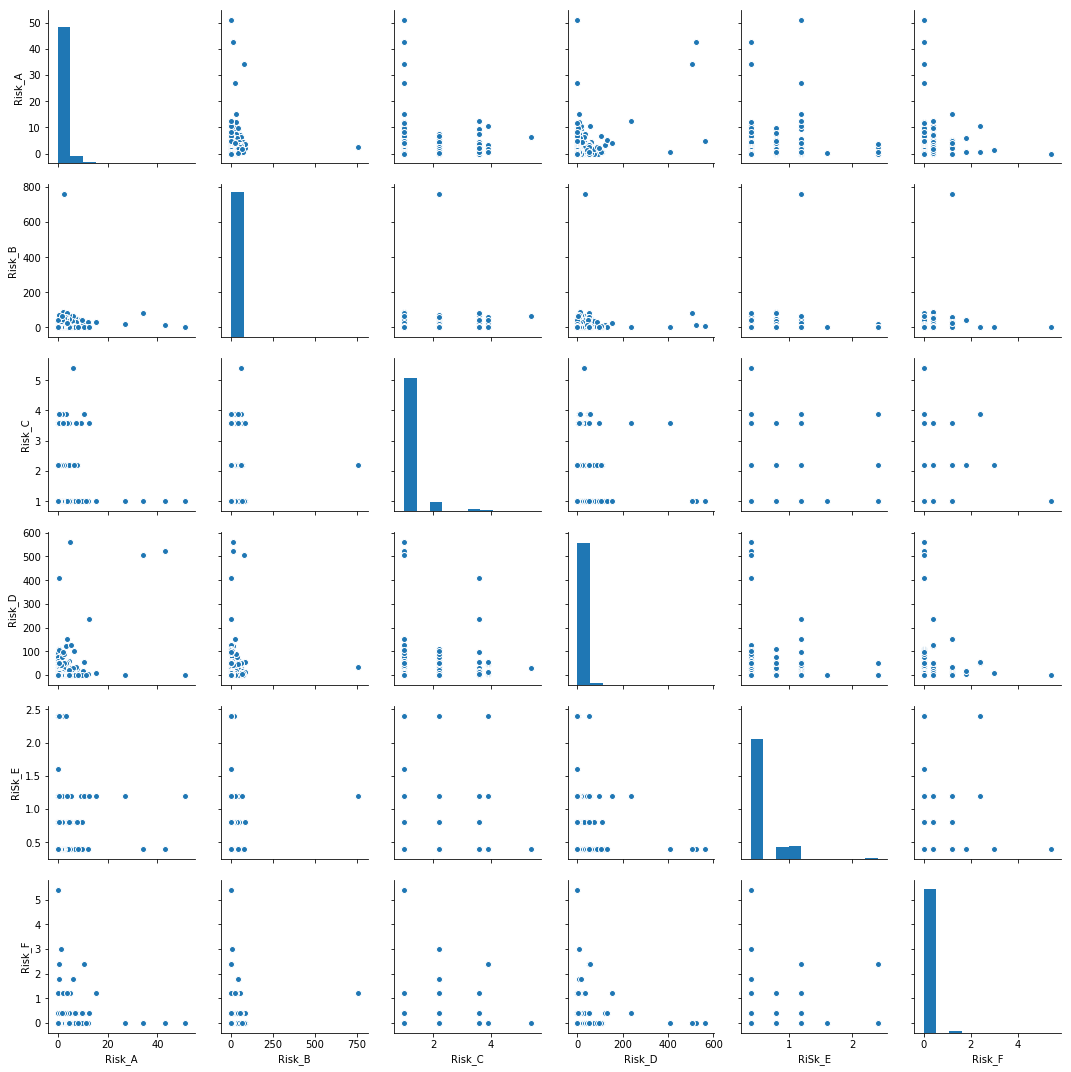

In [16]:
import seaborn as sns
sns_df=merged_new[['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F']]
sns.pairplot(sns_df)

### Removing Outliers

The Outliers in the datasets are also leading to overfitting. These outliers were estimated by the standard deviation method. The observations were scaled and observations above the SD of 3 are tagged as outliers and then removed

In [17]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 809
Data columns (total 23 columns):
Sector_score     750 non-null float64
Risk_A           750 non-null float64
Risk_B           750 non-null float64
Risk_C           750 non-null float64
Score_MV         750 non-null float64
Risk_D           750 non-null float64
PROB             750 non-null float64
RiSk_E           750 non-null float64
History          750 non-null int64
Prob             750 non-null float64
Risk_F           750 non-null float64
Inherent_Risk    750 non-null float64
CONTROL_RISK     750 non-null float64
Audit_Risk       750 non-null float64
Risk_x           750 non-null int64
SCORE_A          750 non-null int64
SCORE_B          750 non-null int64
Marks            750 non-null int64
MONEY_Marks      750 non-null int64
District         750 non-null int64
LOSS_SCORE       750 non-null int64
History_score    750 non-null int64
Risk_y           750 non-null int64
dtypes: float64(13), int64(10)
memory usa

In [18]:

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(merged_new))
print(z)
final_df = merged_new[(z < 3).all(axis=1)]
final_df.head().T

[[0.64868587 0.31843278 0.19816946 ... 0.16793485 0.25107007 0.7413412 ]
 [0.64868587 0.40056617 0.18291401 ... 0.16793485 0.25107007 1.34890655]
 [0.64868587 0.37132459 0.21303207 ... 0.16793485 0.25107007 1.34890655]
 ...
 [1.50493994 0.38680543 0.21427608 ... 0.16793485 0.25107007 1.34890655]
 [1.50493994 0.38909888 0.21453798 ... 0.16793485 0.25107007 1.34890655]
 [1.50493994 0.40056617 0.21453798 ... 0.16793485 0.25107007 1.34890655]]


,0,1,2,4,5
Sector_score,3.8900,3.8900,3.8900,3.8900,3.8900
Risk_A,2.5080,0.0000,0.1020,0.0000,0.0000
Risk_B,0.5000,0.9660,0.0460,0.0160,0.1660
Risk_C,1.0000,1.0000,1.0000,1.0000,1.0000
Score_MV,0.2000,0.2000,0.2000,0.2000,0.2000
Risk_D,0.6760,0.1880,0.0000,0.0000,0.5900
PROB,0.2000,0.2000,0.2000,0.2000,0.2000
RiSk_E,0.4000,0.4000,0.4000,0.4000,0.4000
History,0.0000,0.0000,0.0000,0.0000,0.0000
Prob,0.2000,0.2000,0.2000,0.2000,0.2000


### Removing the 'Risk' columns

In [19]:
merged_new.drop(['Risk_x','Risk_y'],axis=1).head()

,Sector_score,Risk_A,Risk_B,Risk_C,Score_MV,Risk_D,PROB,RiSk_E,History,Prob,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,LOSS_SCORE,History_score
0,3.89,2.508,0.500,1.0,0.2,0.676,0.2,0.4,0,0.2,...,8.574,0.4,1.7148,6,2,2,2,2,2,2
1,3.89,0.000,0.966,1.0,0.2,0.188,0.2,0.4,0,0.2,...,2.554,0.4,0.5108,2,2,2,2,2,2,2
2,3.89,0.102,0.046,1.0,0.2,0.000,0.2,0.4,0,0.2,...,1.548,0.4,0.3096,2,2,2,2,2,2,2
3,3.89,0.000,6.480,3.6,0.6,7.050,0.2,0.4,0,0.2,...,17.530,0.4,3.5060,2,6,6,6,2,2,2
4,3.89,0.000,0.016,1.0,0.2,0.000,0.2,0.4,0,0.2,...,1.416,0.4,0.2832,2,2,2,2,2,2,2


## MODEL ESTIMATION


### Splitting the dataset into training and test data.

In [20]:
X=final_df.drop('Audit_Risk',axis=1)
y=final_df['Audit_Risk']

In [21]:
# split dataset
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### Scaling the data.

The MinMaxScaler shrinks the range such that it is now between 0 and 1 (or -1 to 1 if there exist negative values).
The MinMaxScaler works well for cases when the distribution is not Gaussian or when the standard deviation is very small

In [22]:
#scale dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

## Two models with Bagging

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons



C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Decision Tree

In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor(random_state=0)
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [25]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

Train score: 0.89
Test score: 0.89


Accuracy on Train and Test Data sets in case of Bagging using Decision Tree is 89%

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)


In [27]:
bag_clf = BaggingRegressor(rnd_clf, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

In [28]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [29]:
print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.940


Accuracy on Train and Test Data sets in case of Bagging using Random Forest is 96.9% and 94% which is better than the Decision Tree Regressor

## Two models with Pasting

In [30]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor(random_state=0)
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [31]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

Train score: 0.89
Test score: 0.89


Accuracy on Train and Test Data sets in case of Pasting using  Decision Tree Regressor is 89% 

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)


In [33]:

bag_clf = BaggingRegressor(rnd_clf, n_estimators=500, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

In [34]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [35]:
print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.925


Accuracy on Train and Test Data sets in case of Pasting using Random Forest is 99.1% and 92.5% which is better than the Decision Tree Regressor

## AdaBoosting with KNN Regressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [37]:
from sklearn.ensemble import AdaBoostRegressor


ada_clf = AdaBoostRegressor(knn, n_estimators=200,  learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [38]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.821


Accuracy on Train and Test Data sets in case of Adaboost using KNN Tree Regressor is 99.8% and 82.1% 

## AdaBoost with Random Forest Regressor

In [39]:
from sklearn.ensemble import AdaBoostRegressor


ada_clf = AdaBoostRegressor(rnd_clf, n_estimators=200,  learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [40]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.913


Accuracy on Train and Test Data sets in case of Adaboost using Random Forest Regressor is 99.0% and 91.3% 

## Gradient Boosting Using Random Forest

In [41]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [42]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.949
Accuracy on test set: 0.903


Accuracy on Train and Test Data sets in case of Pasting using Random Forest is 94.9% and 90.3% which is better than the Adaboost 

## PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)


In [44]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [45]:
X_train_pca.shape

X_test_pca.shape


(518, 9)

(173, 9)

The reduced dimensions of Features and Target Variable is 518 and 9 for train and 173 and 9 for Test

### Linear regression

In [46]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)
lreg_train=lreg.score(X_train_pca, y_train)
lreg_test=lreg.score(X_test_pca, y_test)
print(lreg_train,lreg_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.8985337170048219 0.8559139486822707


The Linear regression model has given us an accuracy of 89.8% on train data and 85.5% on test data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'RM')

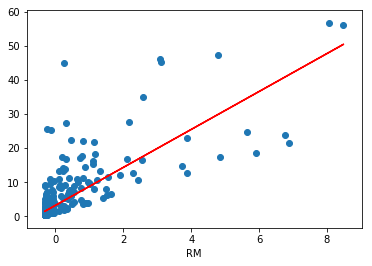

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

#### Best Score on LInear Regression   89.8% on training data and 85.5% on test data

### SGD Regressor

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train_pca, y_train)
sgd_train=sgd_reg.score(X_train_pca, y_train)
sgd_test=sgd_reg.score(X_test_pca, y_test)
print(sgd_train,sgd_test)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False)

0.8985308764510603 0.8559815691491868


The SGD Regressor has performed poorly due to un-optimised hyperparameters used. The model's accuracy can be improved by choosing optimal hyperparameters using GridSearchCV.

### Grid Search with Cross-Validation on SGD

In [49]:
grid =  {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["l1", "l2"]}


sgd=SGDRegressor(max_iter=1000)
grid = GridSearchCV(estimator=sgd, param_grid=grid,cv=10)
grid.fit(X_train_pca,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Best parameters: {'alpha': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.86



#### Best parameters: {'alpha': 0.1, 'penalty': 'l1'}
#### Best cross-validation score: 0.86
The model has significantly imporoved on implementing Grid Search with Cross-Validation. The GridSearch chooses the best 
optimal hyperparameter for the model and also gives the best score for the chosen hyperparamter.



### Ridge Regressor

In [50]:
from  sklearn.linear_model import Ridge

x_range = [0.0000000000000001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train)
    train_score_list.append(ridge.score(X_train_pca,y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))
    
print(train_score_list)
print(test_score_list)

Ridge(alpha=1e-16, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[0.8985337170048219, 0.8985337168523504, 0.8985337017663855, 0.8985322018231323, 0.8983904384911385, 0.889594718104674]
[0.8559139486822709, 0.8559143276226969, 0.8559177236116909, 0.8559502595941824, 0.8561418667769972, 0.8502677830199337]


Text(0.5,0,'$\\alpha$')

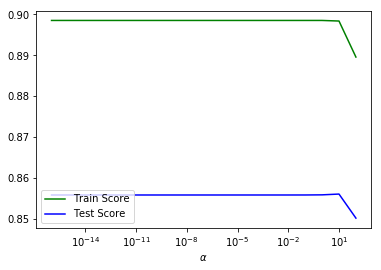

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Best score is 90% on Training data and 86% on Test data.

### Grid Search with Cross Validation on Ridge Regression


In [52]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([0.01,0.1,1,10,100])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=10)
grid.fit(X_train_pca,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Best parameters: {'alpha': 10.0}
Best cross-validation score: 0.85


#### Best parameters: {'alpha': 10}
#### Best cross-validation score: 0.85


### Lasso Regression

In [53]:
from sklearn.linear_model import Lasso
x_range = [0.001,0.01,0.1,1,10 ]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))
    
print(train_score_list)
print(test_score_list)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[0.8985335438875507, 0.898516405277705, 0.8969897958041688, 0.7861860286139355, 0.43457372072931105]
[0.8559374493737603, 0.856132991487353, 0.8579064326723757, 0.7598025273397211, 0.4313724728809075]


Text(0.5,0,'$\\alpha$')

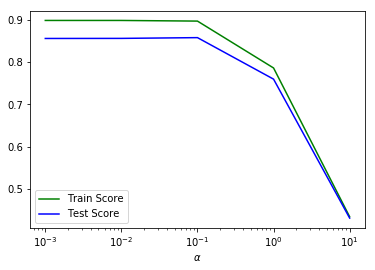

In [54]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Best Score on Lasso Regression is 89% on Training data and 88% on Test data.

### GRid search LASSO

In [55]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([0.01,0.1,1,10,100])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=10)
grid.fit(X_train_pca,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.85


#### Best parameters: {'alpha': 0.1}
#### Best cross-validation score: 0.85


### KNN Regressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))
print(train_score_array)
print(test_score_array)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=17, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=18, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='uniform')

[1.0, 0.9414284139822973, 0.9158684470504007, 0.8963144145269827, 0.8715724729751017, 0.8623845570320294, 0.8559472345944531, 0.8286970151444251, 0.8152910122302898, 0.7946894768658963, 0.7757243538442379, 0.7520165778854092, 0.7363310746923507, 0.7133650075793946, 0.7133303060017497, 0.6969541524055722, 0.6797920268757253, 0.6675728646541798, 0.66839319287917]
[0.8552387246345154, 0.7775358303312545, 0.7875821759335351, 0.7795017257464928, 0.8173421288288016, 0.8079430814711963, 0.8093046733352752, 0.80506967477283, 0.793208115956403, 0.7792377266192527, 0.7622304684276926, 0.7558776915446437, 0.7314524955839727, 0.7139005209995508, 0.7159146410797659, 0.7051993931123977, 0.694194868929084, 0.6851989271082067, 0.6812148374492868]


Text(0.5,0,'k')

Text(0,0.5,'Accuracy')

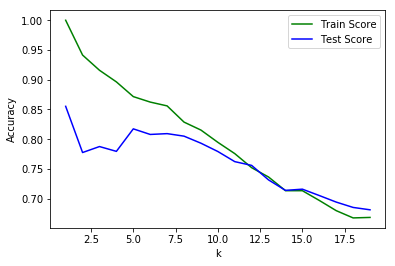

In [57]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

The Best K value here is K=5 from graph

### Grid Search KNN

In [58]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.81


#### Best parameters: {'n_neighbors': 5}
#### Best cross-validation score: 0.81

[0.7064557562478095, 0.7825702810071063, 0.7864835654487337, 0.7960281346251113, 0.8053023108397631, 0.8049125884512758, 0.7859963969392928, 0.7729274764088316, 0.7440028420476718, 0.7233730532954079, 0.69901689620657, 0.684668937043641, 0.6719689701360618, 0.6551407342977936, 0.6393003243044125, 0.6122147157739853, 0.6080705925669855, 0.5925219503466146, 0.5770151352104739]


C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0.5,0,'Value of K for KNN')

Text(0,0.5,'Cross-Validated Accuracy')

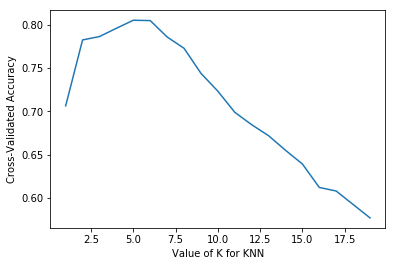

In [60]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
from sklearn.model_selection import GridSearchCV

grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Polynomial regression


In [61]:
train_score_list = []
test_score_list = []
from  sklearn.preprocessing  import PolynomialFeatures

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
train_score_list
test_score_list

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[0.8985337170048219, 0.9997326016681456, 0.9999999192667752, 1.0]

[0.8559139486822709,
 0.9521802495566051,
 -1216253.2051213097,
 -4638.984623642727]

#### Best score for Polynomial Regression is 97.9%

### Decision Tree Regressor

In [62]:
### Decsion Tree regressor
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
dreg=regressor.fit(X_train_pca, y_train) 

print(dreg.score(X_train_pca, y_train))
print(dreg.score(X_test_pca, y_test))

0.9999999998764624
0.8558148030345696


#### Best score for Decision Tree Regression is 85.58%

### Grid Search Decision Tree 

In [63]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20)}
regressor = DecisionTreeRegressor(random_state = 0)  
grid_search = GridSearchCV(regressor, parameters,cv=10)
grid_search.fit(X_train_pca, y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 7, 'min_samples_split': 10}
Best cross-validation score: 0.74


#### Best parameters: {'max_depth': 7, 'min_samples_split': 10}
#### Best cross-validation score: 0.74

### Random forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_reg=rf.fit(X_train_pca, y_train)

print(rf_reg.score(X_train_pca, y_train))
print(rf_reg.score(X_test_pca, y_test))

0.9823947090960763
0.834159986661593


### Grid search Random Forest

In [66]:
clf = RandomForestRegressor()

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5]
}

In [67]:
grid_search = GridSearchCV(clf, param_grid,cv=10)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 5, 10], 'n_estimators': [100, 300], 'max_depth': [3, 5, 15, 25], 'max_features': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 15, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 300}
Best cross-validation score: 0.86


#### Best parameters: {'max_depth': 15, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 100}
#### Best cross-validation score: 0.86

### Support Vector Regressor


In [69]:

from sklearn.svm import SVR
regressor=SVR(kernel='linear')
svr_reg=regressor.fit(X_train_pca,y_train)

print(svr_reg.score(X_train_pca, y_train))
print(svr_reg.score(X_test_pca, y_test))


0.8596842838239562
0.8076176876068356


### Grid search with Cross Validation on SVR

In [70]:
param_grid = {'kernel':('linear', 'rbf'),'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'kernel': ('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
sv_r=SVR()
grid_search = GridSearchCV(sv_r, param_grid,cv=5)

In [72]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.95


#### Best parameters:{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


#### Best cross-validation score: 0.95

### SVR with kernel= 'poly'

In [74]:

from sklearn.svm import SVR
regressor=SVR(kernel='poly')
svr_reg=regressor.fit(X_train_pca,y_train)

print(svr_reg.score(X_train_pca, y_train))
print(svr_reg.score(X_test_pca, y_test))

0.9987687805398635
0.8757001735699417


# Simple Neural Network Model

In [75]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
#step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 22, activation = 'sigmoid'))
#hidden layer
#output layer: no activation function
model1.add(Dense(1))

#step 2: compile the model
model1.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

#step 3: train the model
model1.fit(X_train,y_train, epochs = 20, batch_size = 20)

#step 4: model evaluation

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
518/518 [==============================] - 0s 163us/sample - loss: 48.1685 - mean_squared_error: 48.1685
Epoch 2/20
518/518 [==============================] - 0s 60us/sample - loss: 34.3839 - mean_squared_error: 34.3839
Epoch 3/20
518/518 [==============================] - 0s 43us/sample - loss: 29.0919 - mean_squared_error: 29.0919
Epoch 4/20
518/518 [==============================] - 0s 30us/sample - loss: 25.6900 - mean_squared_error: 25.6900
Epoch 5/20
518/518 [==============================] - 0s 60us/sample - loss: 22.8520 - mean_squared_error: 22.8520
Epoch 6/20
518/518 [==============================] - 0s 30us/sample - loss: 20.4241 - mean_squared_error: 20.4241
Epoch 7/20
518/518 [==============================] - 0s 43us/sample - loss: 18.3673 - mean_squared_error: 18.3673
Epoch 8/20
518/518 [======

In [77]:
model1.evaluate(X_train, y_train)

518/518 [==============================] - 0s 60us/sample - loss: 7.4433 - mean_squared_error: 7.4433


[7.443280462362591, 7.44328]

In [78]:
model1.evaluate(X_test, y_test)

173/173 [==============================] - 0s 0s/sample - loss: 6.3728 - mean_squared_error: 6.3728


[6.372761459708903, 6.3727612]

In [79]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_train)

In [80]:
y_train_pred =  y_pred.reshape(-1,1)
r2_score(y_train, y_train_pred)

0.8517780385694351

In [81]:
r2_score(y_test, model1.predict(X_test))

0.8741429740972196

Compared to all networks neural network is the best model considering the less overfitting problem

## Comparison of PCA with original data set

In [82]:
compare_df=pd.read_csv("regression_comparison.csv",sep="\t")
compare_df

,Name of the Model,Train Scores,Test Scores,PCA_Train_Scores,PCA_Test_Scores
0,Linear Regression,90.0,80.5,89.2,85.5
1,SGD Regressor,88.3,85.2,89.8,85.5
2,Ridge Regressor,90.2,88.2,89.6,85.5
3,Lasso Regressor,89.5,88.9,89.7,85.6
4,K Neighbors Regressor,86.3,85.4,87.3,82.5
5,Polynomial Regressor,98.9,97.2,99.2,95.2
6,Decision Tree Regressor,99.2,92.8,99.8,85.6
7,Random Forest Regressor,99.4,95.8,98.2,83.4
8,Support Vector Regressor,90.1,82.4,86.0,80.7


### Comments

As PCA has reduced variance in the dataset, models such as Lasso, RIdge, KNN, Decision Tree and Random Forest have achieved lesser accuracy when comapred to the models applied on the original Dataset. However for Linear REgression, PCA have pushed the model to perform better when compared to Linear Regression applied on original dataset. The probale explanation is that PCA has reduced noise in the dataset, that have caused for greater accuracy.



## Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.grid_search import GridSearchCV
from  sklearn.model_selection import GridSearchCV

In [3]:
audit_df=pd.read_csv('audit_risk.csv')
audit_df.head().T

trial_df=pd.read_csv('trial.csv')
trial_df.head().T

,0,1,2,3,4
Sector_score,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6
PARA_A,4.18,0,0.51,0,0
SCORE_A,6,2,2,2,2
PARA_B,2.5,4.83,0.23,10.8,0.08
SCORE_B,2,2,2,6,2
TOTAL,6.68,4.83,0.74,10.8,0.08
numbers,5,5,5,6,5
Marks,2,2,2,6,2
Money_Value,3.38,0.94,0,11.75,0


In [4]:
merged_df=pd.merge(audit_df,trial_df,left_on=['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','District_Loss','History','Score']
      ,right_on=['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','District','History','Score'],how='left')

In [5]:
merged_df.shape

(810, 36)

In [6]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,810.0,21.406716,24.760476,1.85,2.3700,3.8900,55.5700,59.8500
PARA_A,810.0,2.348556,5.579501,0.00,0.0700,0.8200,2.3975,85.0000
Score_A,810.0,0.344938,0.173042,0.20,0.2000,0.2000,0.6000,0.6000
Risk_A,810.0,1.294561,3.378180,0.00,0.0140,0.1640,1.4385,51.0000
PARA_B,810.0,10.347643,49.067564,0.00,0.0000,0.3350,2.9850,1264.6300
Score_B,810.0,0.308395,0.167741,0.20,0.2000,0.2000,0.4000,0.6000
Risk_B,810.0,6.068334,29.461510,0.00,0.0000,0.0670,1.3470,758.7780
TOTAL,810.0,12.665829,50.292444,0.00,0.4300,1.2900,7.3375,1268.9100
numbers,810.0,5.064815,0.259188,5.00,5.0000,5.0000,5.0000,9.0000
Score_B.1,810.0,0.222716,0.078789,0.20,0.2000,0.2000,0.2000,0.6000


In [7]:
merged_new=merged_df.copy()

In [8]:
merged_new.drop(['Score_A','Score_B','PARA_A','PARA_B','TOTAL','numbers','Score_B.1','Money_Value','District_Loss','Loss','Score','Detection_Risk'],axis=1,inplace=True)

In [9]:
merged_new.shape

(810, 24)

In [10]:
merged_new.dropna(inplace=True)

#Removing duplicates
merged_new.drop_duplicates(keep=False, inplace=True)

merged_new.drop('LOCATION_ID',axis=1,inplace=True)

In [11]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(merged_new))
print(z)
final_df = merged_new[(z < 3).all(axis=1)]
final_df.head().T

[[0.64639449 0.32047675 0.19769084 ... 0.16759057 0.25053797 0.74550998]
 [0.64639449 0.39975682 0.18240631 ... 0.16759057 0.25053797 1.34136367]
 [0.64639449 0.37046503 0.21258178 ... 0.16759057 0.25053797 1.34136367]
 ...
 [1.5092605  0.38597245 0.21382816 ... 0.16759057 0.25053797 1.34136367]
 [1.5092605  0.38826985 0.21409055 ... 0.16759057 0.25053797 1.34136367]
 [1.5092605  0.39975682 0.21409055 ... 0.16759057 0.25053797 1.34136367]]


,0,1,2,4,5
Sector_score,3.8900,3.8900,3.8900,3.8900,3.8900
Risk_A,2.5080,0.0000,0.1020,0.0000,0.0000
Risk_B,0.5000,0.9660,0.0460,0.0160,0.1660
Risk_C,1.0000,1.0000,1.0000,1.0000,1.0000
Score_MV,0.2000,0.2000,0.2000,0.2000,0.2000
Risk_D,0.6760,0.1880,0.0000,0.0000,0.5900
PROB,0.2000,0.2000,0.2000,0.2000,0.2000
RiSk_E,0.4000,0.4000,0.4000,0.4000,0.4000
History,0.0000,0.0000,0.0000,0.0000,0.0000
Prob,0.2000,0.2000,0.2000,0.2000,0.2000


#### We see that that the Risk variable is highly dependent on the Audit Risk so we chose Risk from the AuditRisk dataframe 

In [12]:
X=final_df.drop(['Risk_x','Risk_y','Audit_Risk'],axis=1)
y=final_df['Risk_x']

In [13]:
# split dataset
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### Scaling the data using MinMax Scaler

In [14]:
#scale dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### The output variable contains 35.4% of the positive class.It can be called as unbalanced dataset by a marginal amount.

In [15]:
y.sum()/len(y)

0.35446685878962536

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


## Checking for the ideal value for k-nn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

#### Understanding the optimum value with the help of graph.

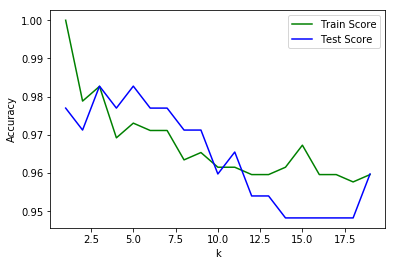

In [18]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

From the graph we can see that for k value 3 the test accuracy is highest with minimum distance between train and test scores.

In [19]:
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Applying SVC including linear,polynomial and Kernel RBF.

In [20]:
from sklearn.svm import LinearSVC,SVC

### Using the  GridSearch to find the best result for SVC with linear kernel

In [21]:
best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
  # for each combination of parameters, train an SVC
    svm = SVC(kernel = 'linear',C=C)
    svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
    score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.99
Best parameters: {'C': 10}


## Using Voting Classifiers (Soft )

For LinearSVC the best score obtained was 99% the Parameter C=10

In [22]:
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', KNeighb...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [106]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression 0.9885057471264368


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier 0.9827586206896551


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC 0.9885057471264368


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeigh...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

VotingClassifier 0.9942528735632183


C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The soft voting classifier has the highest accuracy compared to any other individual classifiers

In [25]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', KNeighb...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [26]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9885057471264368
KNeighborsClassifier 0.9827586206896551
SVC 0.9885057471264368
VotingClassifier 0.9885057471264368


c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\maruthi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

The Hard voting classifier has the highest accuracy compared to any other individual classifiers.But compared to hard voting soft voting is doing better maginally.

## Bagging using Decision Tree

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [31]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9597701149425287


In [32]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f} for Decision Tree'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Decision Tree'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99 for Decision Tree
Test score: 0.96 for Decision Tree


Accuracy on Train and Test Data sets in case of Bagging using Decision Tree Classfier is 99.% and 96.1% 

###  Bagging using Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)

bag_clf = BaggingClassifier(rnd_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

In [34]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f} for Random Forest '.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Random Forest'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99 for Random Forest 
Test score: 0.98 for Random Forest


Accuracy on Train and Test Data sets in case of Bagging using Random Forest Classfier is 99.% and 98.% 

## Pasting Using Decision Tree

In [35]:
boost_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

boost_clf.fit(X_train, y_train)
y_pred = boost_clf.predict(X_test)

In [36]:
print(accuracy_score(y_test, y_pred))

0.9597701149425287


In [37]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f} for Decision Tree using Pasting'.format(boost_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Decision Tree using Pasting'.format(boost_clf.score(X_test, y_test)))

Train score: 0.99 for Decision Tree using Boosting
Test score: 0.96 for Decision Tree using Boosting


Accuracy on Train and Test Data sets in case of Pasting using Decision Tree Classfier is 99.% and 96.1% 

## Pasting Using Random Forest

In [38]:
bag_clf = BaggingClassifier(rnd_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)

print('Train score: {:.2f} for Random Forest using Pasting'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Random Forest using Pasting'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99 for Random Forest using Boosting
Test score: 0.98 for Random Forest using Boosting


Accuracy on Train and Test Data sets in case of Pasting using Random Forest Classfier is 99.% and 98.% 

## Adaboost Classifier using Decision Tree

In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [41]:
y_pred = ada_clf.predict(X_train)

print('Train score: {:.2f} for Adaboost Classifier'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Adaboost Classifier'.format(ada_clf.score(X_test, y_test)))


Train score: 1.00 for Adaboost Classifier
Test score: 0.97 for Adaboost Classifier


Accuracy on Train and Test Data sets in case of Adaboost using Decision Tree Classfier is 100% and 97% 

## Adaboost Using Random Forest

In [101]:
ad_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ad_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [102]:
y_pred = ad_clf.predict(X_train)

print('Train score: {:.2f} for Adaboost Classifier'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Adaboost Classifier'.format(ada_clf.score(X_test, y_test)))

Train score: 1.00 for Adaboost Classifier
Test score: 0.98 for Adaboost Classifier


Accuracy on Train and Test Data sets in case of Adaboost using Random Forest Classfier is 100% and 98.% 

## Gradient Boost Classifier 

In [106]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=500, learning_rate=0.1, random_state=0)
gbrt.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [107]:
y_pred = gbrt.predict(X_train)

print('Train score: {:.2f} for Gradient Boosting Classifier'.format(ad_clf.score(X_train, y_train)))
print('Test score: {:.2f} for Gradient Boosting Classifier'.format(ad_clf.score(X_test, y_test)))

Train score: 1.00 for Gradient Boosting Classifier
Test score: 0.98 for Gradient Boosting Classifier


Accuracy on Train and Test Data sets using Gradient Boost Classfier is 100% and 98.% 

# Using PCA

In [122]:
from sklearn.decomposition import PCA

pca = PCA(.95)

In [123]:
X_train_pca = pca.fit_transform(X_train)

In [124]:
X_test_pca = pca.fit_transform(X_test)

### Applying Logistic Regression on the dataset

In [125]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_pca, y_train)
    log_l2.fit(X_train_pca, y_train)
    train_score_l1.append(log_l1.score(X_train_pca, y_train))
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    test_score_l1.append(log_l1.score(X_test_pca, y_test))
    test_score_l2.append(log_l2.score(X_test_pca, y_test))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
train_score_l1,test_score_l1

([0.6384615384615384,
  0.9134615384615384,
  0.9461538461538461,
  0.9576923076923077,
  0.9576923076923077,
  0.9596153846153846,
  0.9596153846153846],
 [0.6666666666666666,
  0.9022988505747126,
  0.9827586206896551,
  0.9597701149425287,
  0.9482758620689655,
  0.9252873563218391,
  0.9195402298850575])

In [127]:
min_list=[]
for x in range(0,7):
#     print(x,train_score_l1[x]-test_score_l1[x])
    ans_1=abs(train_score_l1[x]-test_score_l1[x])
    min_list.append(ans_1)
print(min_list)

[0.028205128205128216, 0.01116268788682584, 0.036604774535809015, 0.0020778072502209977, 0.009416445623342207, 0.03432802829354553, 0.04007515473032719]


#### Subtracting the train and test scores of maximum accuracy to find the minimum distance.
#### The best C value is 1 for L1 penalty

In [128]:
train_score_l2,test_score_l2

([0.8673076923076923,
  0.8846153846153846,
  0.9538461538461539,
  0.9596153846153846,
  0.9576923076923077,
  0.9576923076923077,
  0.9596153846153846],
 [0.9022988505747126,
  0.9252873563218391,
  0.9655172413793104,
  0.9137931034482759,
  0.9195402298850575,
  0.9195402298850575,
  0.9195402298850575])

#### Subtracting the train and test scores of maximum accuracy to find the minimum distance.

In [129]:
min_list1=[]
for x in range(0,7):
#     print(x,train_score_l1[x]-test_score_l1[x])
    ans_1=abs(train_score_l2[x]-test_score_l2[x])
    min_list1.append(ans_1)
print(min_list1)

[0.03499115826702026, 0.040671971706454535, 0.011671087533156488, 0.045822281167108736, 0.03815207780725027, 0.03815207780725027, 0.04007515473032719]


#### The best C value is 0.1 for L2 penalty

#### Comparing both the models with L1 and L2 penalty with the help of graphs

Text(0.5,0,'Regularization parameter: C')

Text(0,0.5,'Accuracy')

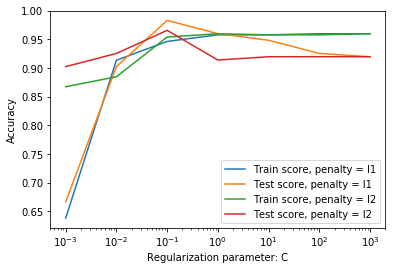

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

From the graph, and train test scores we can infer that there is no much difference between l1 and l2 but l1 penalty seems to be outperforming with a (99.42 vs 98.85) minor lead in the test score.

### Applying KNeighbors Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

#### Understanding the optimum value with the help of graph.

Text(0.5,0,'k')

Text(0,0.5,'Accuracy')

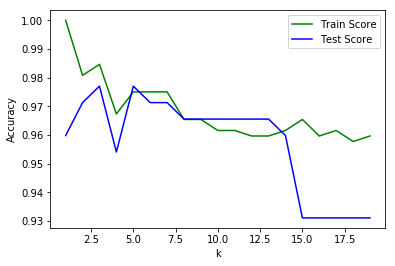

In [132]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

From the graph we can see that for k value 8 the test accuracy is highest with minimum distance between train and test scores.

In [133]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_pca, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Train score: 0.9846
Test score: 0.9770


### Applying SVC including linear,polynomial and Kernel RBF.

In [134]:
from sklearn.svm import LinearSVC,SVC

clf = LinearSVC()
clf.fit(X_train_pca,y_train)
clf.score(X_train_pca, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

0.9596153846153846

In [135]:
clf.predict(X_test_pca)
clf.score(X_test_pca, y_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

0.9195402298850575

We observe that the train score is 95.96 and the test score is 91.95

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\abhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(0.5,0,'Feature 0')

Text(0,0.5,'Feature 1')

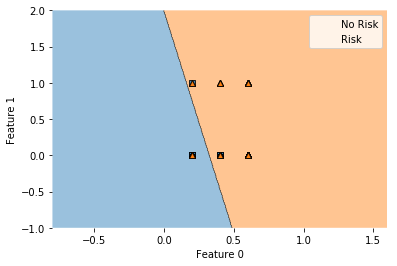

In [136]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

X_red = X[['Score_MV','History']].as_matrix(columns=None)
y_ar = np.array(y)

clf_r = LinearSVC()
clf_r.fit(X_red,y_ar)
plot_decision_regions(X_red,y_ar, clf_r)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['No Risk', 'Risk']) 

### Using the Naive GridSearch to find the best result for SVC with linear kernel

In [137]:
from sklearn.svm import SVC
test_best_score = 0
best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
  # for each combination of parameters, train an SVC
    svm = SVC(kernel = 'linear',C=C)
    svm.fit(X_train_pca, y_train)
        # evaluate the SVC on the test set
    score = svm.score(X_test_pca, y_test)
    test_score = svm.score(X_train_pca, y_train)
        # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        test_best_score = test_score
        best_parameters = {'C': C}
        
print("Best Test Score: {:.2f}".format(test_best_score))
print("Best Train score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best Test Score: 0.96
Best Train score: 0.98
Best parameters: {'C': 0.1}


For LinearSVC the best score obtained was 98% the Parameter C=0.1

### Using the Naive GridSearch to find the best result for SVC with polynomial kernel

In [138]:
from sklearn.svm import SVC
best_score = 0

for degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel = 'poly',degree=degree, C=C)
        svm.fit(X_train_pca, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test_pca, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'degree': degree}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=9, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score: 0.96
Best parameters: {'C': 10, 'degree': 1}


For Polynomial SVC the best score obtained was 96% the Parameter degree = 1 and C=10

### Using the Naive GridSearch to find the best result for SVC with RBF kernel

In [139]:
from sklearn.svm import SVC
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel = 'rbf',gamma=gamma, C=C)
        svm.fit(X_train_pca, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test_pca, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


print("Best parameters: {}".format(best_parameters))

svm = SVC(kernel = 'rbf',gamma=1, C=100)
svm.fit(X_train_pca,y_train)
print("Best score for test: {:.2f}".format(svm.score(X_train_pca,y_train)))
svm.fit(X_test_pca,y_test)
print("Best score for train: {:.2f}".format(svm.score(X_test_pca,y_test)))

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best parameters: {'C': 100, 'gamma': 1}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score for test: 0.98


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score for train: 0.99


For Polynomial SVC the best score obtained was 98 % the Parameter C = 100 and Gamma 1

### Using the GridSearch to find the best result for SVC with RBF kernel

In [140]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X1_trainval, X1_test, y1_trainval, y1_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_trainval, y1_trainval, random_state=1)

X1_train_pca =pca.fit_transform(X1_train)

X1_valid_pca =pca.fit_transform(X1_valid)

X1_test_pca = pca.fit_transform(X1_test)

X1_trainval_pca =pca.fit_transform(X1_trainval)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X1_train.shape[0], X1_valid.shape[0], X1_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X1_train_pca, y1_train)
        # evaluate the SVC on the validation set
        score = svm.score(X1_valid_pca, y1_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X1_trainval_pca, y1_trainval)
test_score = svm.score(X1_test_pca, y1_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 390   size of validation set: 130   size of test set: 174



SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best score on validation set: 0.89
Best parameters:  {'C': 0.1, 'gamma': 0.001}
Test set score with best parameters: 0.87


The best score obtained on Validation Set is 89 with Parmeters C:0.1 and gamma:0.001
The test score is equivalent to other models with 87% accuracy.

### Applying Decision Tree Classifier

#### Identifying the most important feature for classification.

#### Using the decision tree without specifying any depth.

In [141]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_pca, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy on training set: 1.000
Accuracy on test set: 0.925


### Applying Dummy Classfier

In [142]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier().fit(X_train_pca, y_train)
pred_dummy = dummy.predict(X_test_pca)
print("dummy score: {:.2f}".format(dummy.score(X_test_pca, y_test)))

dummy score: 0.53


C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\dummy.py:227: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  k in range(self.n_outputs_)).T


The accuracy is very poor compared to other classifiers.This model is not preferable for the classification.

#### Applying Dummy Classfier with the Most_Frequent Class

In [143]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train_pca, y_train)

pred_most_frequent = dummy_majority.predict(X_test_pca)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test_pca, y_test)))

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Unique predicted labels: [0]
Test score: 0.67


The accuracy is very poor compared to other classifiers.This model is not preferable for the classification but still performs better than the Dummy classifier.

### Confusion Matrix for the Logistic Regression

In [144]:
from sklearn.metrics import confusion_matrix

log = LogisticRegression(C=1).fit(X_train_pca, y_train)
pred_logreg = log.predict(X_test_pca)
pred_knn = knn.predict(X_test_pca)

lin_svc = SVC(kernel = 'linear', C=0.1)
lin_svc.fit(X_train_pca, y_train)

poly_svc = SVC(kernel = 'poly',degree=1, C=10)
poly_svc.fit(X_train_pca, y_train)

rbf_svc = SVC(kernel = 'rbf',gamma=0.001, C=0.1)
rbf_svc.fit(X_train_pca, y_train)

print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))
print("\nKNeighbors Classifier")
print(confusion_matrix(y_test, pred_knn))
print("\nLinear SVC")
print(confusion_matrix(y_test, lin_svc.predict(X_test_pca)))
print("\nPolynomial SVC")
print(confusion_matrix(y_test, poly_svc.predict(X_test_pca)))
print("\nRBF Kernel SVC")
print(confusion_matrix(y_test, rbf_svc.predict(X_test_pca)))
print("\nDecision tree:")
print(confusion_matrix(y_test, dtree.predict(X_test_pca)))
print("\nMost frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Logistic Regression
[[105  11]
 [  4  54]]

KNeighbors Classifier
[[116   0]
 [  4  54]]

Linear SVC
[[116   0]
 [  4  54]]

Polynomial SVC
[[112   4]
 [  3  55]]

RBF Kernel SVC
[[116   0]
 [ 58   0]]

Decision tree:
[[106  10]
 [  3  55]]

Most frequent class:
[[116   0]
 [ 58   0]]

Dummy model:
[[76 40]
 [36 22]]


We can observe different Confusion Matrices for different algorithms used in classification

In [145]:
from sklearn.metrics import classification_report

print("\nLogistic Regression")
print(classification_report(y_test, pred_logreg, target_names=["Not Risk", "Risk"]))
print("\nKNeighbors Classifier")
print(classification_report(y_test, pred_knn, target_names=["Not Risk", "Risk"]))
print("\nLinear SVC")
print(classification_report(y_test, lin_svc.predict(X_test_pca), target_names=["Not Risk", "Risk"]))
print("\nPolynomial SVC")
print(classification_report(y_test, poly_svc.predict(X_test_pca), target_names=["Not Risk", "Risk"]))
print("\nRBF Kernel SVC")
print(classification_report(y_test, rbf_svc.predict(X_test_pca), target_names=["Not Risk", "Risk"]))
print("\nDecision tree:")
print(classification_report(y_test, dtree.predict(X_test_pca), target_names=["Not Risk", "Risk"]))
print("Most frequent class:")
print(classification_report(y_test, pred_most_frequent, target_names=["Not Risk", "Risk"]))
print("\nDummy model:")
print(classification_report(y_test, pred_dummy, target_names=["Not Risk", "Risk"]))


Logistic Regression
             precision    recall  f1-score   support

   Not Risk       0.96      0.91      0.93       116
       Risk       0.83      0.93      0.88        58

avg / total       0.92      0.91      0.91       174


KNeighbors Classifier
             precision    recall  f1-score   support

   Not Risk       0.97      1.00      0.98       116
       Risk       1.00      0.93      0.96        58

avg / total       0.98      0.98      0.98       174


Linear SVC
             precision    recall  f1-score   support

   Not Risk       0.97      1.00      0.98       116
       Risk       1.00      0.93      0.96        58

avg / total       0.98      0.98      0.98       174


Polynomial SVC
             precision    recall  f1-score   support

   Not Risk       0.97      0.97      0.97       116
       Risk       0.93      0.95      0.94        58

avg / total       0.96      0.96      0.96       174


RBF Kernel SVC
             precision    recall  f1-score   support

C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


It is important to specifically identify the Audit whether its Fraud or Not Fraud.As we donot want to miss out on identifying the fradulent Audits we consider Recall as the Primary metric.

We can observe that Recall for identifying fradulent Class is highest for DecisionTree and Can be considered the best model out of all the Classification Models with recall rate of 0.95.

But at the same time its important to identify the fraud and also to not accuse prominent people of comitting fraud so if we choose F-1 score to be the Classification Metric.

We see that considering F-1 score LinearSVC model performs the best with score of 0.98.

### Graphing the precision_recall_curve vs Classifier

Text(0.5,0,'Precision')

Text(0,0.5,'Recall')

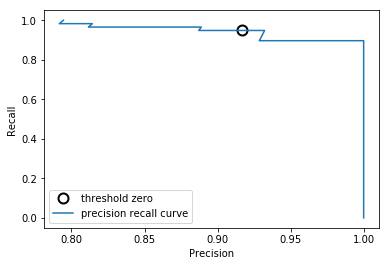

In [146]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

svc = SVC(kernel = 'linear',C=1).fit(X_train_pca, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test_pca))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

The important observation is that at Zero threshold the precision is around 0.96 and recall 0.95.

### Graphing the precision_recall_curve vs Classifier with Kernel

Text(0.5,0,'Precision')

Text(0,0.5,'Recall')

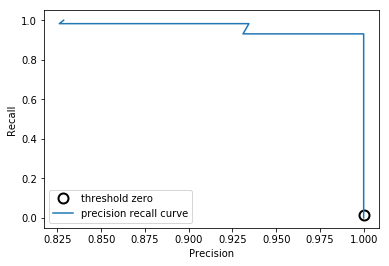

In [147]:
%matplotlib inline
svc = SVC(kernel='rbf',gamma=.001,C=0.1).fit(X_train_pca, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test_pca))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


The important observation is that at Zero threshold the precision is around 1 and recall 0.

### Applying the Random Classifier and analyzing the Precision Recall Curve using graph

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Text(0.5,0,'Precision')

Text(0,0.5,'Recall')

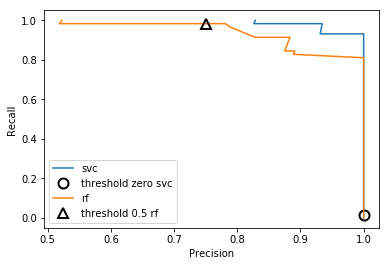

In [148]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train_pca, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test_pca)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

From the graph we see that at Zero threshold SVC is performing better than Random Forest.

In [149]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test_pca))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test_pca))))
print("Train score:{:.2f}".format(rf.score(X_train_pca,y_train)))
print("Test Score:{:.2f}".format(rf.score(X_test_pca,y_test)))

f1_score of random forest: 0.857
f1_score of svc: 0.000
Train score:1.00
Test Score:0.89


C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Calculating and Plotting ROC Curve for SVC

Text(0.5,0,'FPR')

Text(0,0.5,'TPR (recall)')

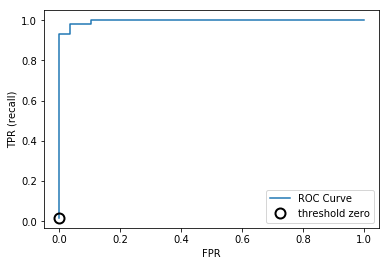

In [150]:
%matplotlib inline

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test_pca))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Calculating and Plotting ROC-AUC Curve for SVC with Kernel RBF

<Figure size 432x288 with 0 Axes>

gamma = 0.00  accuracy = 0.94  AUC = 0.99


gamma = 0.01  accuracy = 0.94  AUC = 0.99


gamma = 0.10  accuracy = 0.93  AUC = 0.99


gamma = 1.00  accuracy = 0.97  AUC = 1.00


Text(0.5,0,'FPR')

Text(0,0.5,'TPR')

(-0.01, 1)

(0, 1.02)

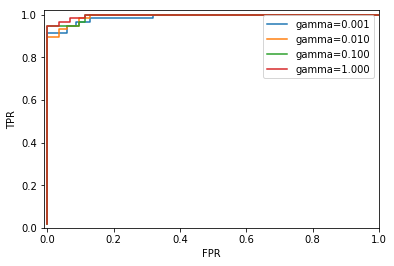

In [151]:
%matplotlib inline

from sklearn.metrics import roc_auc_score

plt.figure()

for gamma in [0.001, 0.01, 0.1, 1]:
    svc = SVC(gamma=gamma,C=100).fit(X_train_pca, y_train)
    accuracy = svc.score(X_test_pca, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test_pca))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test_pca))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    	gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

From the graph we can see that the AUC is highest for the gamma 1

## Using Neural Networks

### Model Preceptron

In [152]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [153]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 20, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 200, batch_size = 300)

#step 4: evaluation

Epoch 1/200
520/520 [==============================] - 0s 247us/sample - loss: 0.6501 - acc: 0.7538
Epoch 2/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6461 - acc: 0.7846
Epoch 3/200
520/520 [==============================] - 0s 30us/sample - loss: 0.6420 - acc: 0.7846
Epoch 4/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6381 - acc: 0.7885
Epoch 5/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6341 - acc: 0.7923
Epoch 6/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6302 - acc: 0.7923
Epoch 7/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6262 - acc: 0.7904
Epoch 8/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6223 - acc: 0.7942
Epoch 9/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6184 - acc: 0.7962
Epoch 10/200
520/520 [==============================] - 0s 0s/sample - loss: 0.6146 - acc: 0.7962
Epoch 11/200
520/520 [==

520/520 [==============================] - 0s 8us/sample - loss: 0.2133 - acc: 0.9442
Epoch 166/200
520/520 [==============================] - 0s 8us/sample - loss: 0.2121 - acc: 0.9462
Epoch 167/200
520/520 [==============================] - 0s 6us/sample - loss: 0.2109 - acc: 0.9481
Epoch 168/200
520/520 [==============================] - 0s 6us/sample - loss: 0.2098 - acc: 0.9481
Epoch 169/200
520/520 [==============================] - 0s 6us/sample - loss: 0.2087 - acc: 0.9500
Epoch 170/200
520/520 [==============================] - 0s 6us/sample - loss: 0.2075 - acc: 0.9500
Epoch 171/200
520/520 [==============================] - 0s 6us/sample - loss: 0.2064 - acc: 0.9500
Epoch 172/200
520/520 [==============================] - 0s 8us/sample - loss: 0.2053 - acc: 0.9500
Epoch 173/200
520/520 [==============================] - 0s 8us/sample - loss: 0.2042 - acc: 0.9500
Epoch 174/200
520/520 [==============================] - 0s 6us/sample - loss: 0.2031 - acc: 0.9500
Epoch 175/200


In [154]:
model1.evaluate(X_train, y_train)

520/520 [==============================] - 0s 94us/sample - loss: 0.1777 - acc: 0.9519


[0.17766319077748519, 0.9519231]

In [155]:
model1.evaluate(X_test, y_test)

174/174 [==============================] - 0s 29us/sample - loss: 0.1512 - acc: 0.9713


[0.15122972565820847, 0.97126436]

### Multi Level Preceptron

In [156]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 20, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 50, batch_size = 150)

#step 4: evaluate

Epoch 1/50
520/520 [==============================] - 0s 526us/sample - loss: 0.7053 - acc: 0.3308
Epoch 2/50
520/520 [==============================] - 0s 17us/sample - loss: 0.6986 - acc: 0.4173
Epoch 3/50
520/520 [==============================] - 0s 17us/sample - loss: 0.6922 - acc: 0.5038
Epoch 4/50
520/520 [==============================] - 0s 21us/sample - loss: 0.6855 - acc: 0.7327
Epoch 5/50
520/520 [==============================] - 0s 19us/sample - loss: 0.6801 - acc: 0.7981
Epoch 6/50
520/520 [==============================] - 0s 19us/sample - loss: 0.6742 - acc: 0.8346
Epoch 7/50
520/520 [==============================] - 0s 17us/sample - loss: 0.6679 - acc: 0.8519
Epoch 8/50
520/520 [==============================] - 0s 19us/sample - loss: 0.6616 - acc: 0.8673
Epoch 9/50
520/520 [==============================] - 0s 17us/sample - loss: 0.6550 - acc: 0.8673
Epoch 10/50
520/520 [==============================] - 0s 15us/sample - loss: 0.6477 - acc: 0.8712
Epoch 11/50
520/52

In [157]:
model2.fit(X_train, y_train, epochs = 50, batch_size = 150)

Epoch 1/50
520/520 [==============================] - 0s 15us/sample - loss: 0.1848 - acc: 0.9577
Epoch 2/50
520/520 [==============================] - 0s 21us/sample - loss: 0.1781 - acc: 0.9577
Epoch 3/50
520/520 [==============================] - 0s 21us/sample - loss: 0.1719 - acc: 0.9577
Epoch 4/50
520/520 [==============================] - 0s 12us/sample - loss: 0.1661 - acc: 0.9558
Epoch 5/50
520/520 [==============================] - 0s 13us/sample - loss: 0.1603 - acc: 0.9558
Epoch 6/50
520/520 [==============================] - 0s 12us/sample - loss: 0.1550 - acc: 0.9577
Epoch 7/50
520/520 [==============================] - 0s 13us/sample - loss: 0.1499 - acc: 0.9577
Epoch 8/50
520/520 [==============================] - 0s 13us/sample - loss: 0.1452 - acc: 0.9577
Epoch 9/50
520/520 [==============================] - 0s 12us/sample - loss: 0.1406 - acc: 0.9577
Epoch 10/50
520/520 [==============================] - 0s 15us/sample - loss: 0.1362 - acc: 0.9596
Epoch 11/50
520/520

In [158]:
model2.evaluate(X_train, y_train)

520/520 [==============================] - 0s 129us/sample - loss: 0.0649 - acc: 0.9750


[0.06493628644026243, 0.975]

In [159]:
model2.evaluate(X_test, y_test)

174/174 [==============================] - 0s 40us/sample - loss: 0.0564 - acc: 0.9713


[0.05641963161613749, 0.97126436]

The accuracy of the data set is found to be 98% for both train and test which is far more higher than any one of the models

## Comparing the Classifiers with and without PCA 

In [160]:
compare_pca = pd.read_csv("Classifier_Files.csv")
compare_pca

,Name of the Model,Train Scores,Test Scores,PCA_Train_Scores,PCA_Test_Scores
0,Logistic Regression,98.65,99.42,95.76,95.97
1,K Neighbors Classifier,95.96,94.83,98.46,97.70
2,SVC with Linear,98.27,97.88,95.96,91.95
3,SVC with Polynomial,98.00,98.00,98.00,96.00
4,SVC with RBF,98.00,99.00,99.00,98.00
5,Decision Tree,100.00,96.60,100.00,92.50
6,Random Forest,100.00,98.00,100.00,89.00


Summary

We can clearly observe from the table that in case of PCA the scores are slightly lesser when compared to the Scores in the dataset where dimension reduction is not done as we have only captured 95% of the variance.So its according to the PCA behaviour we see that they lower test scores.So, We can clearly see that its easier to run the algorithms on PCA.

### CONCLUSION

#### From our analysis, the best Regression model is Gradient Boosting  with an accuracy of 91% and the best optimal hyperparameters used are {'max_depth=2, n_estimators=3, learning_rate=1.0'}

#### The best classification model is Adaboost Classifier model with an accuracy of 98.% and the optimal hyperparameters used is {n_estimators=500, max_leaf_nodes=16}